# Préparation des données :
    
    - Convertir en noir et blanc
    - Mettre sour la forme d'un vecteur 32x32
    - récupérer les labels sous forme d'entier 

In [1]:
import glob
import re
from scipy import misc
import pandas as  pd
import numpy as np

from sklearn.model_selection import train_test_split
import cPickle as pickle 

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
labels_dict = {'airplane':0,
               'automobile':1, 
               'bird':2,
               'cat':3,
               'deer':4,
               'dog':5,
               'frog':6,
               'horse':7,
               'ship':8, 
               'truck':9}

### Pour les données d'entrainement 

#### Exemple pour une image 

In [3]:
image_path = 'train/9967.png'

(32, 32, 3)


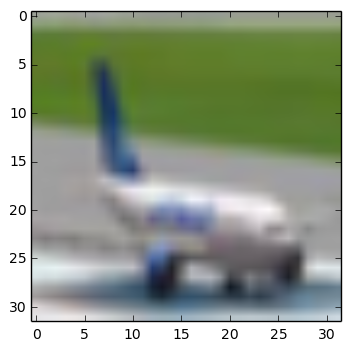

In [4]:
img_color = misc.imread(image_path)
print img_color.shape
plt.imshow(img_color)

### Retrouver le label ? 

In [5]:
!ls

preparation_donnees-CNN.ipynb  sampleSubmission.csv  train	trainLabels.csv
preparation_donnees.ipynb      test		     train.pkl


In [6]:
df = pd.read_csv('trainLabels.csv', sep=',', skiprows=0)

In [7]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [8]:
image_path

'train/9967.png'

In [9]:
id_image  = re.findall(r'\d+', image_path)[0]
print id_image

9967


In [10]:
label = df.get_value(int(id_image) - 1,'label')
print label

airplane


In [12]:
encoded_label = labels_dict[label]
print encoded_label

0


### On reprend tout 

In [13]:
path = 'train/*.png'
files = glob.glob(path)

In [14]:
print len(files)
files[:5]

50000


['train/9967.png',
 'train/9968.png',
 'train/9969.png',
 'train/997.png',
 'train/9970.png']

In [18]:
X = []
y = []

df = pd.read_csv('trainLabels.csv', sep=',', skiprows=0)

for i,file in enumerate(files):
    img = misc.imread(file)
    
    X.append(img/255.0)
    
    id_image  = re.findall(r'\d+', file)[0]
    label = df.get_value(int(id_image) - 1,'label')
    
    y.append(labels_dict[label])
    
    if (i+1)%10000==0:
        print i
    
    

9999
19999
29999
39999
49999


In [19]:
X = np.asarray(X, dtype='float32')
y = np.asarray(y, dtype='int8')

print X.shape
print y.shape

(50000, 32, 32, 3)
(50000,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [21]:
print X_train.shape
print X_test.shape

(42500, 32, 32, 3)
(7500, 32, 32, 3)


In [22]:
pickle.dump((X_train, X_test, y_train, y_test),open("train_CNN.pkl","w"))